In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
import warnings
warnings.simplefilter('ignore')

In [187]:
df=pd.read_csv('train.csv')
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [188]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [189]:
df.drop(['Unnamed: 0', 'Booking_ID'],inplace=True,axis=1)

In [190]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [191]:
df.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [192]:
df.duplicated().sum()

np.int64(7661)

In [193]:
df.drop_duplicates(inplace=True)

In [194]:
df.shape

(21359, 18)

In [195]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [196]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

In [197]:
cat_cols=[ 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest','booking_status']

num_cols=['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

### Data Analysis

In [198]:
data=df.copy()

In [199]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


### Univariate Analysis

In [200]:
def num_plots(df,num_features):
    fig,ax=plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        ax=[ax]
    for i,feature in enumerate(num_features):
        sns.histplot(data=df,x=feature,ax=ax[i][0],kde=True,palette='Blues')
        ax[i][0].set_title(f'Histogram for {feature}')
        sns.boxplot(data=df,x=feature,ax=ax[i][1],palette='Blues')
        ax[i][1].set_title(f'Boxplot for {feature}')
    plt.tight_layout()
    plt.show()

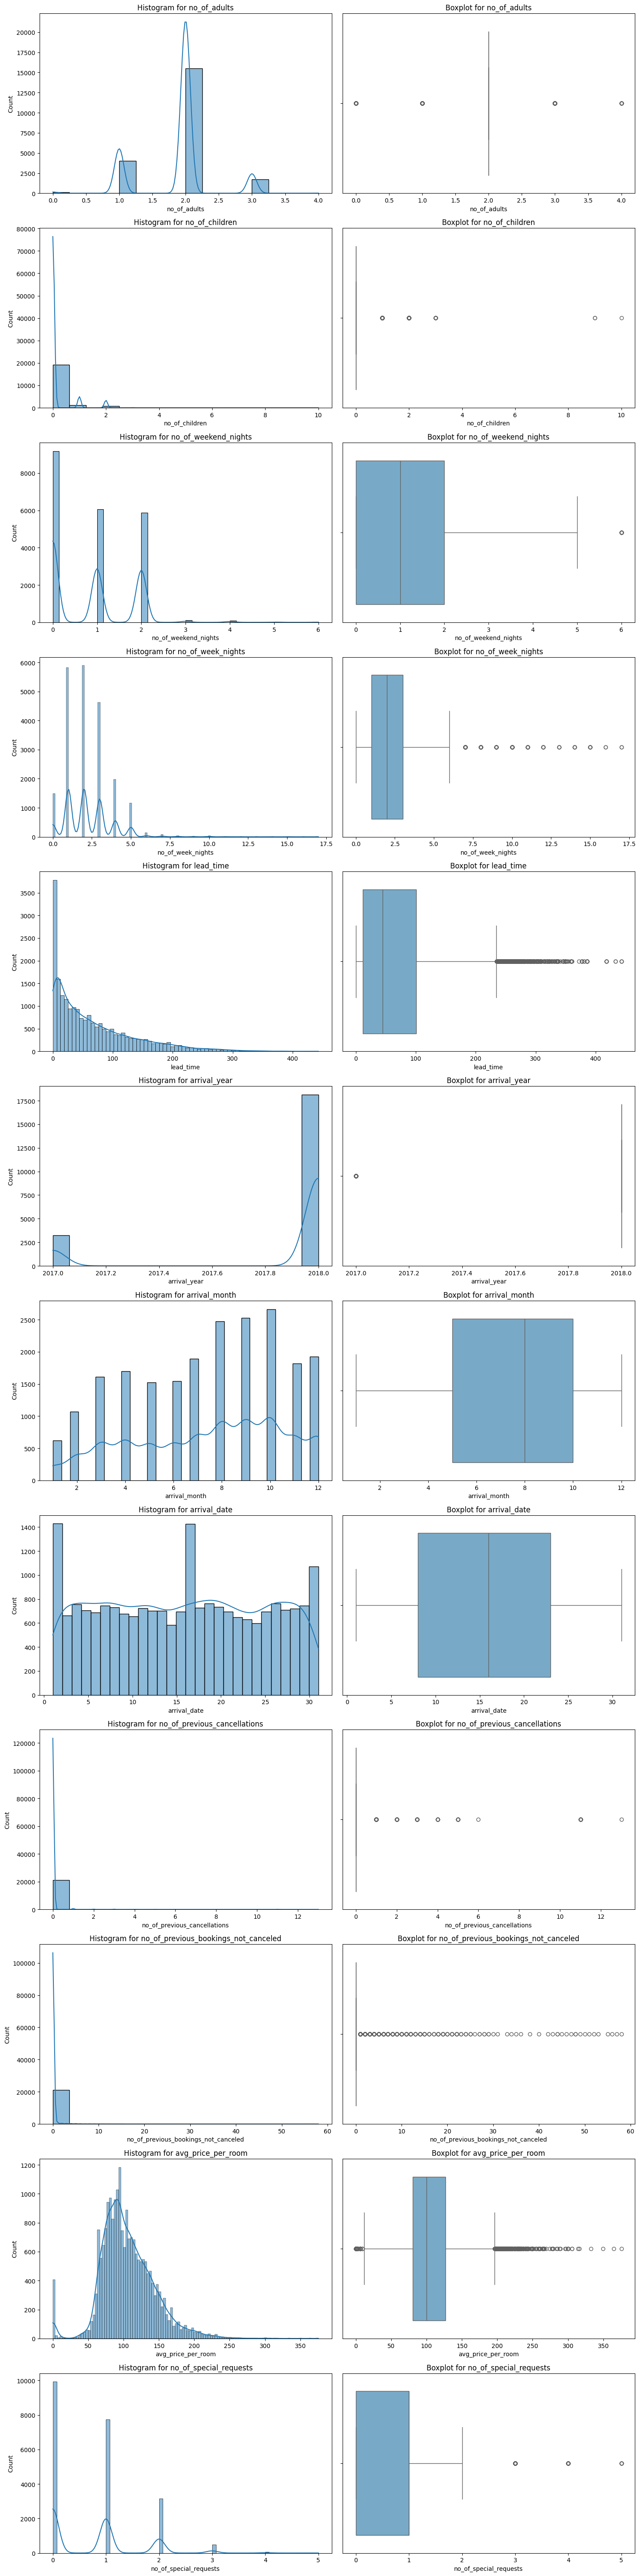

In [201]:
num_plots(data,num_cols)

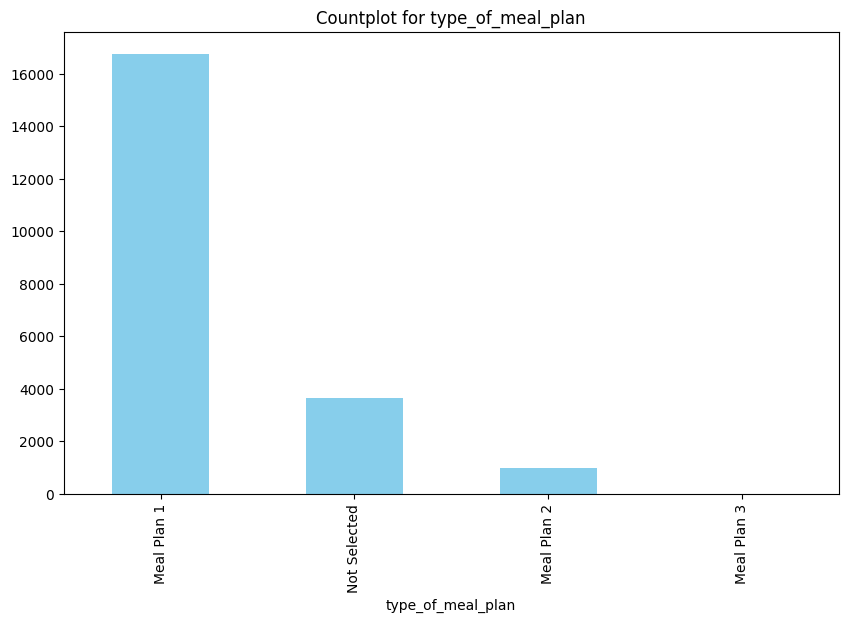

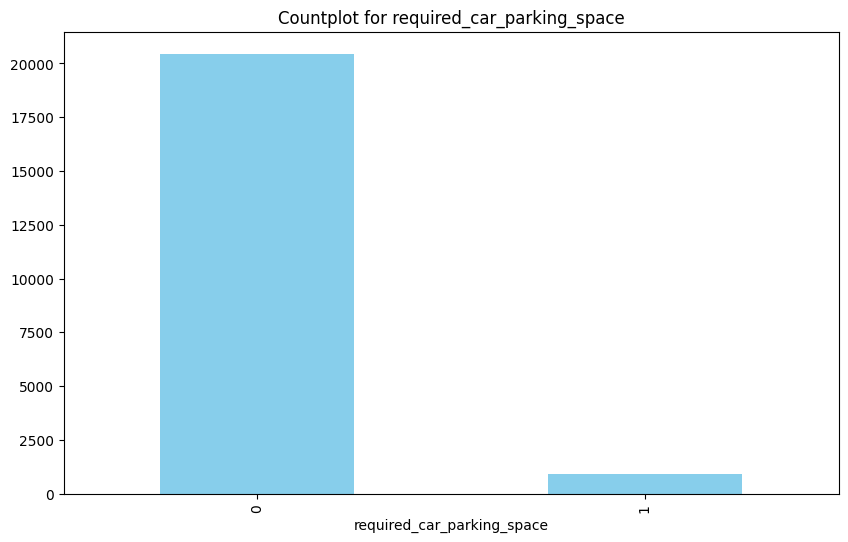

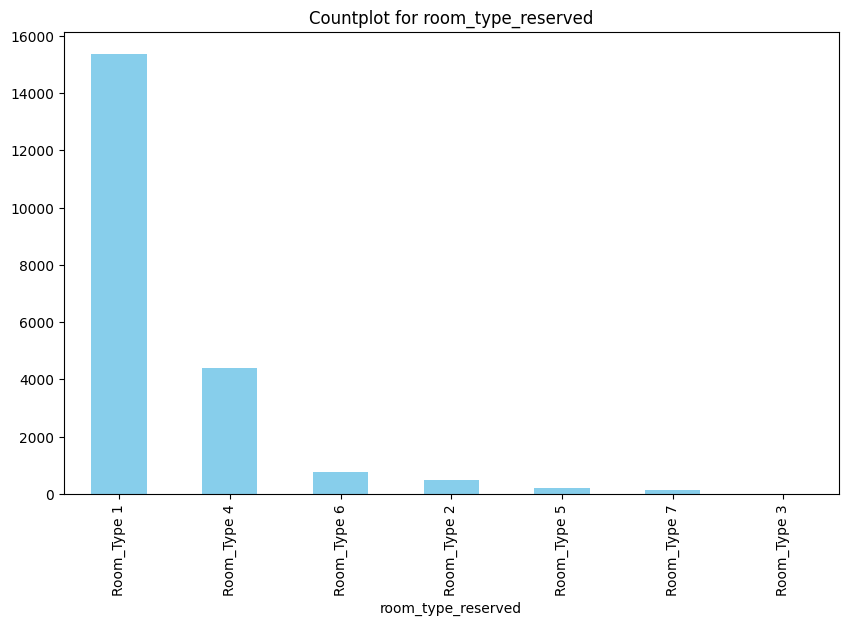

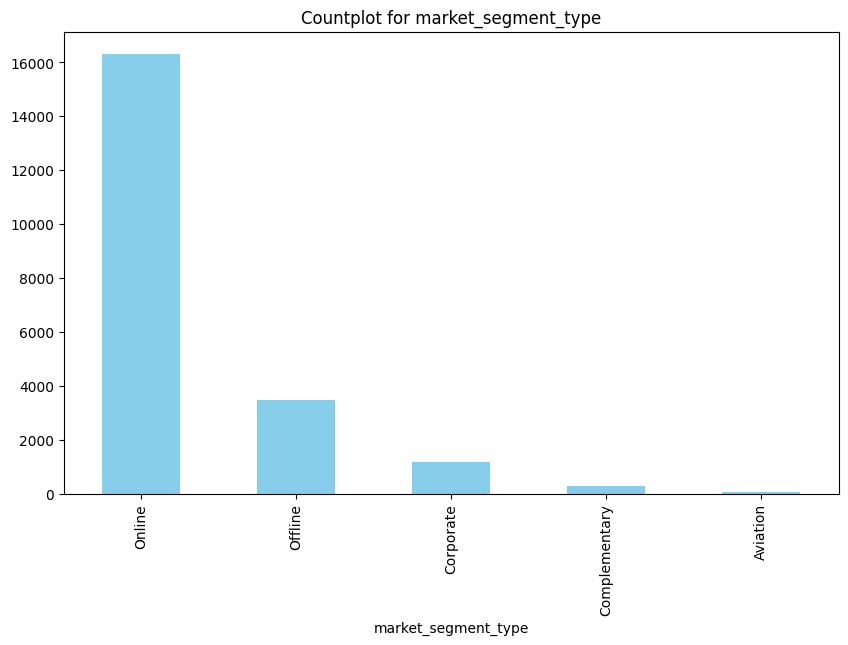

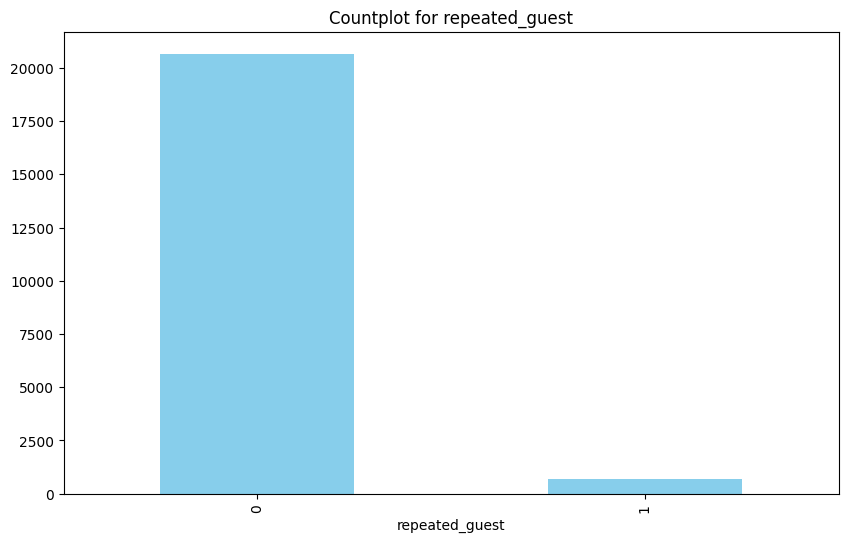

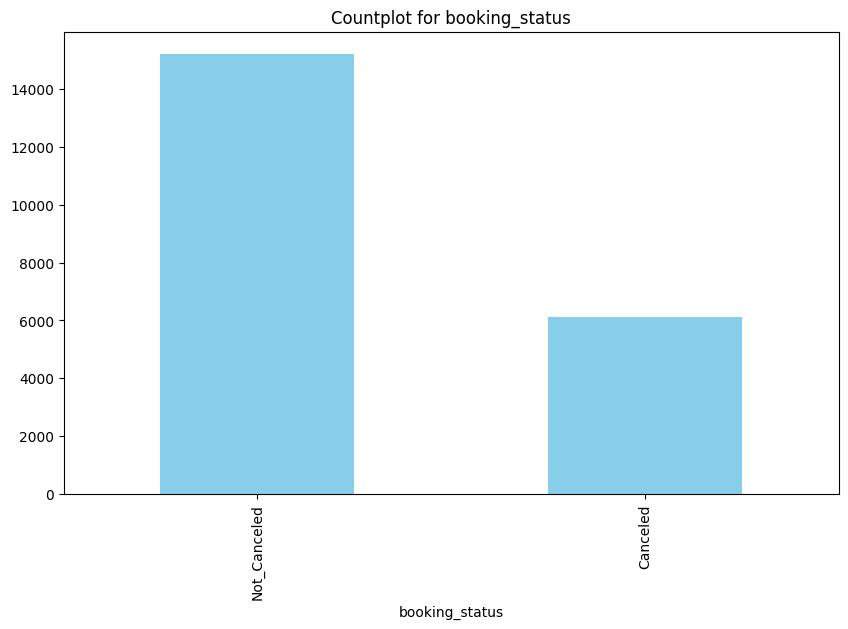

In [202]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar',color='skyblue')
    plt.title(f'Countplot for {cat_feature}')
    plt.show()

### Bivariate Analysis

In [203]:
def plot_bivariate_num(df,tareget_feature,num_feature):
    num_plots=len(num_feature)
    num_rows=(num_plots+1)//2
    fig,ax=plt.subplots(num_rows,2,figsize=(15,num_rows*5))
    ax=ax.flatten()
    for i,col in enumerate(num_feature):
        sns.boxplot(data=df,x=col,y=tareget_feature,ax=ax[i],palette='Blues')
        ax[i].set_title(f'{col} vs {tareget_feature}')
    plt.tight_layout()
    plt.show()

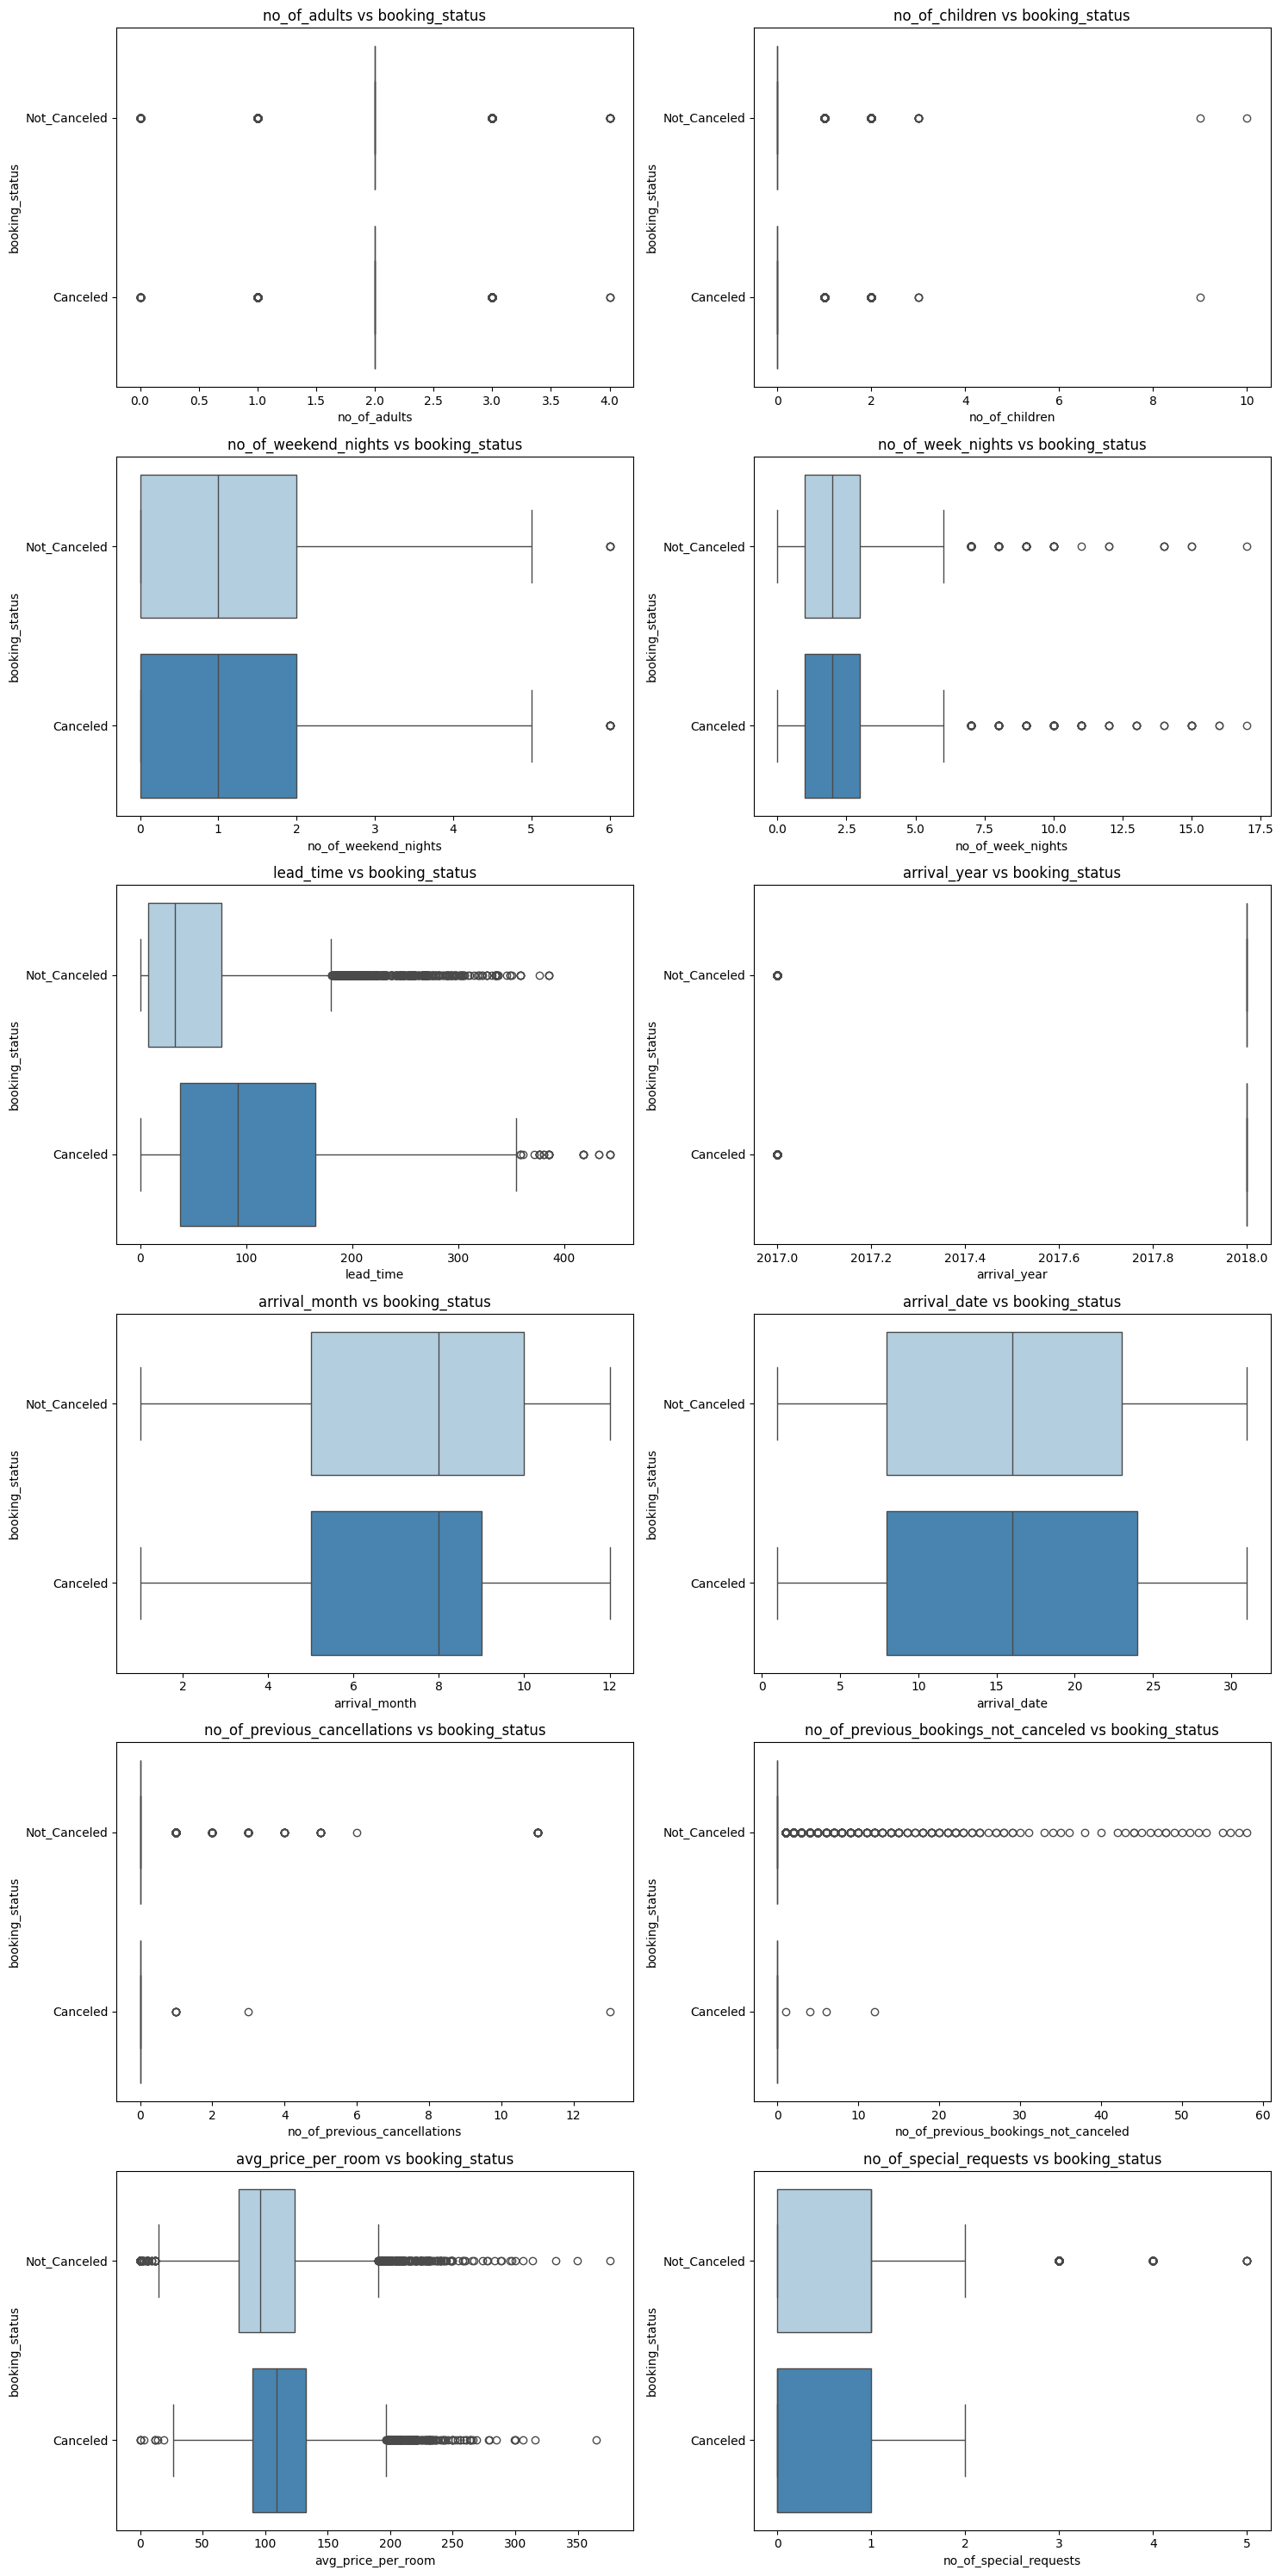

In [204]:
plot_bivariate_num(data,'booking_status',num_cols)

In [205]:
def plot_bivariate_cat(df,tareget_feature,cat_feature):
    num_plots=len(cat_feature)
    num_rows=(num_plots+1)//2
    fig,ax=plt.subplots(num_rows,2,figsize=(15,num_rows*5))
    ax=ax.flatten()
    for i,col in enumerate(cat_feature):
        sns.countplot(data=df,x=col,hue=tareget_feature,ax=ax[i],palette='Set2')
        ax[i].set_title(f'{col} vs {tareget_feature}')
        ax[i].tick_params(axis='x',rotation=90)
    plt.tight_layout()
    plt.show()

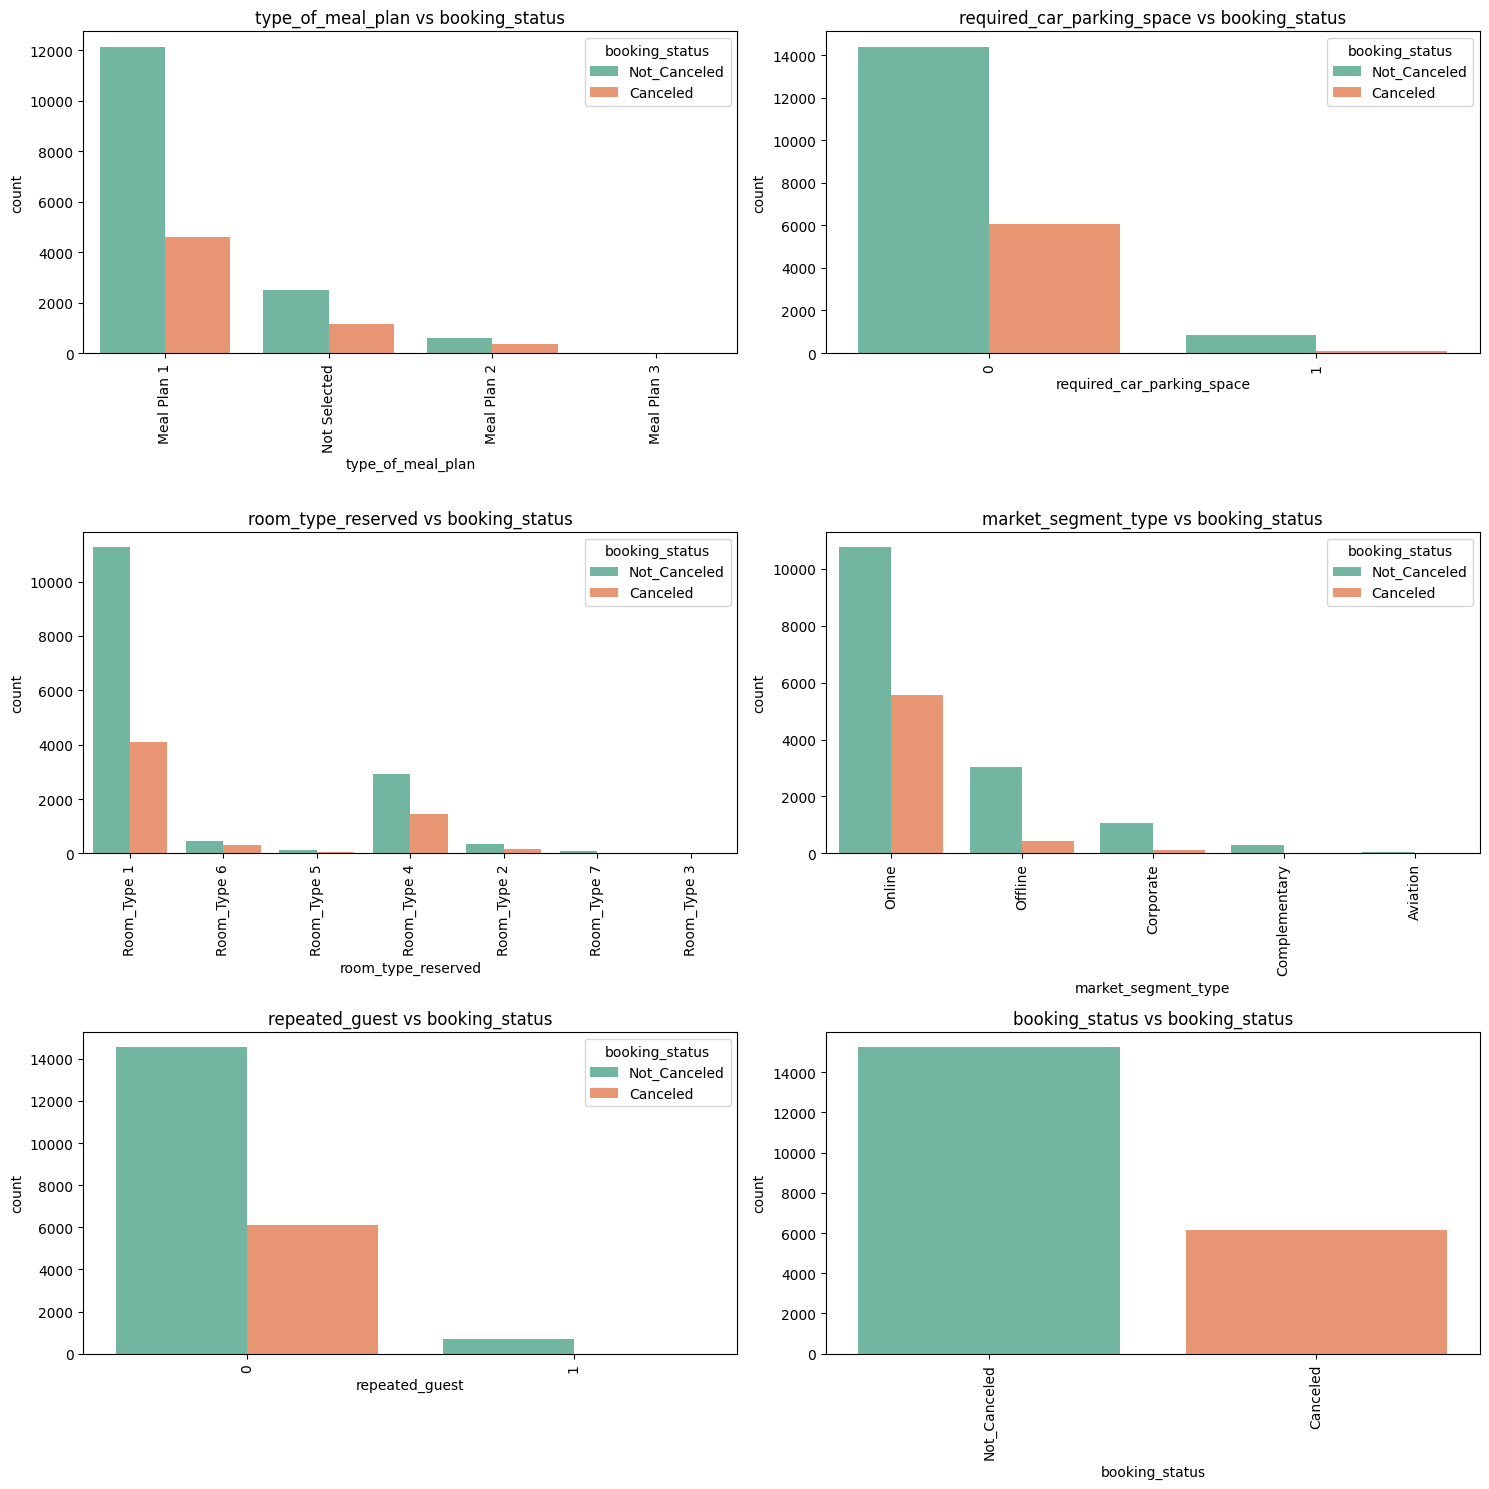

In [206]:
plot_bivariate_cat(data,'booking_status',cat_cols)

### Data Processing

In [207]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

### Label Encoding

In [209]:
from sklearn.preprocessing import LabelEncoder

In [210]:
le=LabelEncoder()
mappings={}
for col in cat_cols:
    df[col]=le.fit_transform(df[col])
    mappings[col]={label:code for label,code in zip(le.classes_,le.transform(le.classes_))}

In [211]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

### Multicollinearity

In [212]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [213]:
X=add_constant(df)
vif_data=pd.DataFrame()
vif_data['features']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [214]:
vif_data

,features,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


In [215]:
corr=df.corr()

<Axes: >

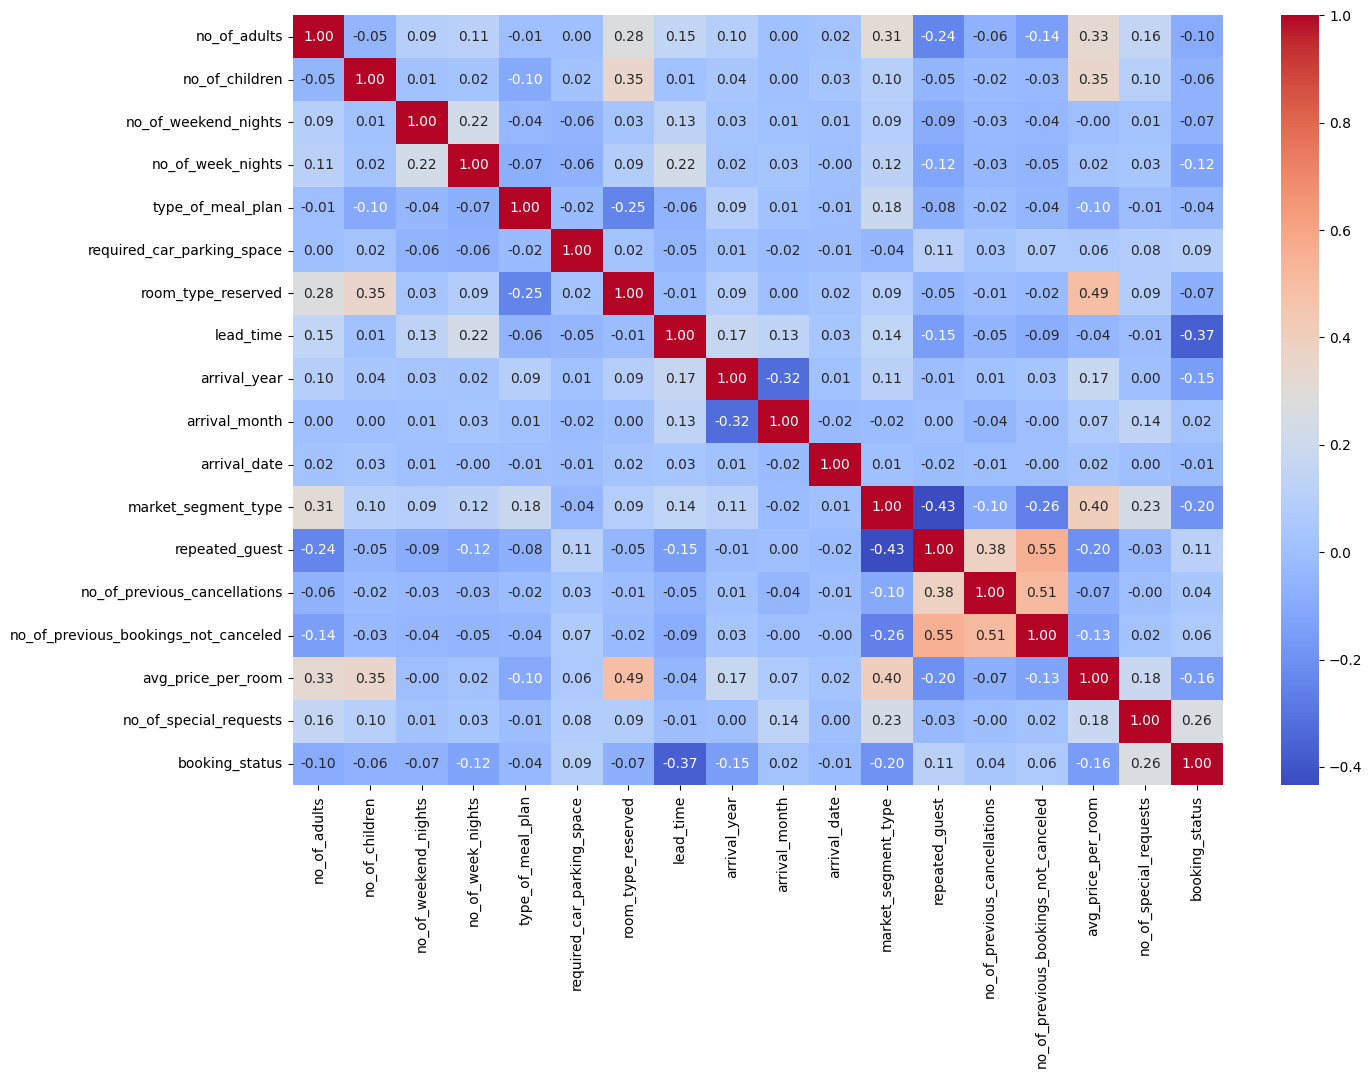

In [216]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')

### Skewness

In [217]:
skewness=df.skew()

In [218]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [219]:
for col in df.columns:
    if skewness[col]>5:
        df[col]=np.log1p(df[col])

### Imbalanced Data

In [220]:
df['booking_status'].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [221]:
x=df.drop('booking_status',axis=1)
y=df['booking_status']

In [222]:
x.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [223]:
from imblearn.over_sampling import SMOTE

In [224]:
smote=SMOTE(random_state=42)
x_resampled,y_resampled=smote.fit_resample(x,y)

In [225]:
y_resampled

0        1
1        1
2        0
3        1
4        0
        ..
30457    0
30458    0
30459    0
30460    0
30461    0
Name: booking_status, Length: 30462, dtype: int64

In [226]:
balanced_df=pd.DataFrame(x_resampled,columns=x.columns)
balanced_df['booking_status']=y_resampled

In [227]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [228]:
df=balanced_df.copy()

### Feature Selection

In [229]:
from sklearn.ensemble import RandomForestClassifier

In [230]:
x=df.drop('booking_status',axis=1)
y=df['booking_status']

In [231]:
model=RandomForestClassifier(random_state=42)
model.fit(x,y)

RandomForestClassifier(random_state=42)

In [232]:
feature_importance=model.feature_importances_

In [233]:
featuredf=pd.DataFrame({'features':x.columns,'importance':feature_importance})

In [234]:
featuredf

,features,importance
0,no_of_adults,0.017789
1,no_of_children,0.006895
2,no_of_weekend_nights,0.030436
3,no_of_week_nights,0.044465
4,type_of_meal_plan,0.020160
5,required_car_parking_space,0.011259
6,room_type_reserved,0.019279
7,lead_time,0.261140
8,arrival_year,0.017168
9,arrival_month,0.086560


In [235]:
top_10=featuredf.sort_values(by='importance',ascending=False).head(9)

In [236]:
top_10_df=df[top_10['features'].tolist() + ['booking_status']]

In [237]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,booking_status
0,26,0,161.00,10,17,4,1,2,0,1
1,98,2,121.50,7,16,4,1,1,0,1
2,433,0,70.00,9,8,3,3,0,0,0
3,195,0,72.25,8,8,3,5,2,0,1
4,188,0,130.00,6,15,3,2,0,0,0


In [238]:
df=top_10_df.copy()

### Model Selection

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [240]:
x=df.drop('booking_status',axis=1)
y=df['booking_status']

In [241]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [242]:
classifiers={
    'Random Forest':RandomForestClassifier(random_state=42),
    'Logistic Regression':LogisticRegression(random_state=42),
    'Gradient Boosting':GradientBoostingClassifier(random_state=42),
    'AdaBoost':AdaBoostClassifier(random_state=42),
    'SVC':SVC(random_state=42),
    'Decision Tree':DecisionTreeClassifier(random_state=42),
    'GaussianNB':GaussianNB(),
    'KNeighbors':KNeighborsClassifier(),
    'XGBoost':XGBClassifier(random_state=42),
    'LightGBM':LGBMClassifier(random_state=42)
}

In [243]:
metrics={
    'Model':[],
    'Accuracy':[],
    'Precision':[],
    'Recall':[],
    'F1 Score':[]
}

In [244]:
for model_name,classifier in classifiers.items():
    classifier.fit(xtrain,ytrain)
    ypred=classifier.predict(xtest)
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy_score(ytest,ypred))
    metrics['Precision'].append(precision_score(ytest,ypred))
    metrics['Recall'].append(recall_score(ytest,ypred))
    metrics['F1 Score'].append(f1_score(ytest,ypred))

[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 594
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [245]:
metrics_df=pd.DataFrame(metrics)

In [246]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.892171,0.896484,0.888599,0.892524
1,Logistic Regression,0.773839,0.799787,0.735179,0.766124
2,Gradient Boosting,0.837026,0.820822,0.865472,0.842556
3,AdaBoost,0.804366,0.800769,0.814332,0.807494
4,SVC,0.721648,0.732252,0.705537,0.718646
5,Decision Tree,0.839488,0.850301,0.827036,0.838507
6,GaussianNB,0.779583,0.809831,0.735179,0.770702
7,KNeighbors,0.779255,0.850467,0.681759,0.756825
8,XGBoost,0.870671,0.868065,0.876547,0.872285
9,LightGBM,0.863122,0.850470,0.883713,0.866773


### Lets Train Our RF Model

In [247]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [248]:
x=df.drop('booking_status',axis=1)
y=df['booking_status']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [249]:
rf=RandomForestClassifier(random_state=42)

In [250]:
params_dist={
    'n_estimators':randint(100,500),
    'max_depth':randint(10,50),
    'min_samples_split':randint(2,10),
    'min_samples_leaf':randint(1,5),
    'bootstrap':[True,False],
}

In [251]:
random_search=RandomizedSearchCV(
    rf,
    param_distributions=params_dist,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [252]:
random_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.0s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.0s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   7.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   7.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   7.1s
[C

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x137bfdf10>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x137d95430>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x130eeef00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x130afb020>},
                   random_state=42, scoring='accuracy', verbose=2)

In [253]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 22,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 458}

In [254]:
best_rf=random_search.best_estimator_

In [255]:
ypred=best_rf.predict(xtest)

In [256]:
accuracy_score(ytest,ypred)

0.8924995896930904

In [257]:
precision_score(ytest,ypred)

0.8949950932286556

In [258]:
recall_score(ytest,ypred)

0.8912052117263843

In [259]:
f1_score(ytest,ypred)

0.893096131875306

### Save This Model

In [260]:
import joblib

In [ ]:
joblib.dump(best_rf,'best_model.pkl')

In [ ]:
loaded_model=joblib.load('best_model.pkl')

In [ ]:
xtrain[0:1]

In [ ]:
new_data=xtrain.iloc[0:1].values

In [ ]:
new_data

In [ ]:
prediction=loaded_model.predict(new_data)

In [ ]:
prediction